# DF/DN on CIFAR

In [1]:
# Import necessary packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Define color palette
sns.set(color_codes=True, style="white", context="talk", font_scale=1.5)

In [3]:
def load_result(filename):
    """
    Loads results from specified file
    """
    inputs = open(filename, "r")
    lines = inputs.readlines()
    ls = []
    for line in lines:
        ls.append(float(line.strip()))
    return ls


def load_results(prefix):
    """
    Loads results from specified files
    """
    acc_ls = []
    time_ls = []
    for name in names:
        acc_ls.append(load_result(prefix + name + ".txt"))
        time_ls.append(load_result(prefix + name + "_train_time.txt"))
    return acc_ls, time_ls


def load_results_st(prefix):
    """
    Loads results from similar time files
    """
    acc_ls = []
    time_ls = []
    for name in names:
        if name != "naive_rf" and name != "svm":
            acc_ls.append(load_result(prefix + name + "_st.txt"))
            time_ls.append(load_result(prefix + name + "_train_time_st.txt"))
        else:
            acc_ls.append(load_result(prefix + name + ".txt"))
            time_ls.append(load_result(prefix + name + "_train_time.txt"))
    return acc_ls, time_ls


def load_results_sc(prefix):
    """
    Loads results from similar cost files
    """
    acc_ls = []
    time_ls = []
    for name in names:
        if name != "naive_rf" and name != "svm":
            acc_ls.append(load_result(prefix + name + "_sc.txt"))
            time_ls.append(load_result(prefix + name + "_train_time_sc.txt"))
        else:
            acc_ls.append(load_result(prefix + name + ".txt"))
            time_ls.append(load_result(prefix + name + "_train_time_lc.txt"))
    return acc_ls, time_ls


def produce_mean(ls):
    """
    Produces means from list of 8 results
    """
    ls_space = []
    for i in range(int(len(ls) / 8)):
        l = ls[i * 8 : (i + 1) * 8]
        ls_space.append(l)

    return np.mean(ls_space, axis=0)

In [13]:
def plot_acc(col, accs, pos, samples_space):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 8 : (k + 1) * 8],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 8 : (k + 1) * 8],
            color="#377eb8",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][2][k * 8 : (k + 1) * 8],
            color="#377eb8",
            linestyle="dashed",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][3][k * 8 : (k + 1) * 8],
            color="#377eb8",
            linestyle="dotted",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][4][k * 8 : (k + 1) * 8],
            color="#4daf4a",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="CNN-1L",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="RF",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][2]),
            linewidth=5,
            color="#377eb8",
            linestyle="dashed",
            label="CNN-2L",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][3]),
            linewidth=5,
            color="#377eb8",
            linestyle="dotted",
            label="CNN-5L",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][4]),
            linewidth=5,
            color="#4daf4a",
            label="ResNet-18",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][2]),
            linewidth=5,
            color="#377eb8",
            linestyle="dashed",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][3]),
            linewidth=5,
            color="#377eb8",
            linestyle="dotted",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][4]),
            linewidth=5,
            color="#4daf4a",
        )


def plot_six():
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(17, 11), constrained_layout=True)

    fig.text(0.53, -0.05, "Number of Train Samples", ha="center")
    xtitles = ["3 Classes", "8 Classes", "90 Classes"]
    ytitles = ["Accuracy", "Wall Time (s)"]
    ylimits = [[0, 1], [1e-2, 1e2]]
    yticks = [[0, 0.5, 1], [1e-2, 1e0, 1e2]]

    for i, row in enumerate(ax):
        for j, col in enumerate(row):
            count = 3 * i + j
            col.set_xscale("log")
            col.set_ylim(ylimits[i])

            if count == 2 or count == 5:
                samples_space = np.geomspace(100, 10000, num=8, dtype=int)
            else:
                samples_space = np.geomspace(10, 10000, num=8, dtype=int)

            # Label x axis and plot figures
            if count < 3:
                col.set_xticks([])
                col.set_title(xtitles[j])
                plot_acc(col, accs, j, samples_space)
            else:
                if count == 5:
                    col.set_xticks([1e2, 1e3, 1e4])
                else:
                    col.set_xticks([1e1, 1e2, 1e3, 1e4])
                col.set_yscale("log")
                plot_acc(col, accs, j + 3, samples_space)

            # Label y axis
            if count % 3 == 0:
                col.set_yticks(yticks[i])
                col.set_ylabel(ytitles[i])
            else:
                col.set_yticks([])

    fig.align_ylabels(
        ax[
            :,
        ]
    )

    leg = fig.legend(
        bbox_to_anchor=(0.53, -0.2),
        bbox_transform=plt.gcf().transFigure,
        ncol=3,
        loc="lower center",
    )
    leg.get_frame().set_linewidth(0.0)
    for legobj in leg.legendHandles:
        legobj.set_linewidth(5.0)

In [17]:
def plot_acc_new(col, accs, pos, samples_space):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 8 : (k + 1) * 8],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 8 : (k + 1) * 8],
            color="#377eb8",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][2][k * 8 : (k + 1) * 8],
            color="#377eb8",
            linestyle="dashed",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][3][k * 8 : (k + 1) * 8],
            color="#377eb8",
            linestyle="dotted",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][4][k * 8 : (k + 1) * 8],
            color="#4daf4a",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][5][k * 8 : (k + 1) * 8],
            color="#ff7f00",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="CNN-1L",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="RF",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][2]),
            linewidth=5,
            color="#377eb8",
            linestyle="dashed",
            label="CNN-2L",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][3]),
            linewidth=5,
            color="#377eb8",
            linestyle="dotted",
            label="CNN-5L",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][4]),
            linewidth=5,
            color="#4daf4a",
            label="ResNet-18",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][5]),
            linewidth=5,
            color="#ff7f00",
            label="XGBT",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][2]),
            linewidth=5,
            color="#377eb8",
            linestyle="dashed",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][3]),
            linewidth=5,
            color="#377eb8",
            linestyle="dotted",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][4]),
            linewidth=5,
            color="#4daf4a",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][5]),
            linewidth=5,
            color="#ff7f00",
        )

## DF/DN with Unbounded Time & Cost

## Comparsion of all six models of 3classes(2hr vs 6hr)

/var/folders/w0/pq4q2kj50fvdt6t_4y4gqfvw0000gn/T/ipykernel_61284/1640363079.py:61: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in leg.legendHandles:


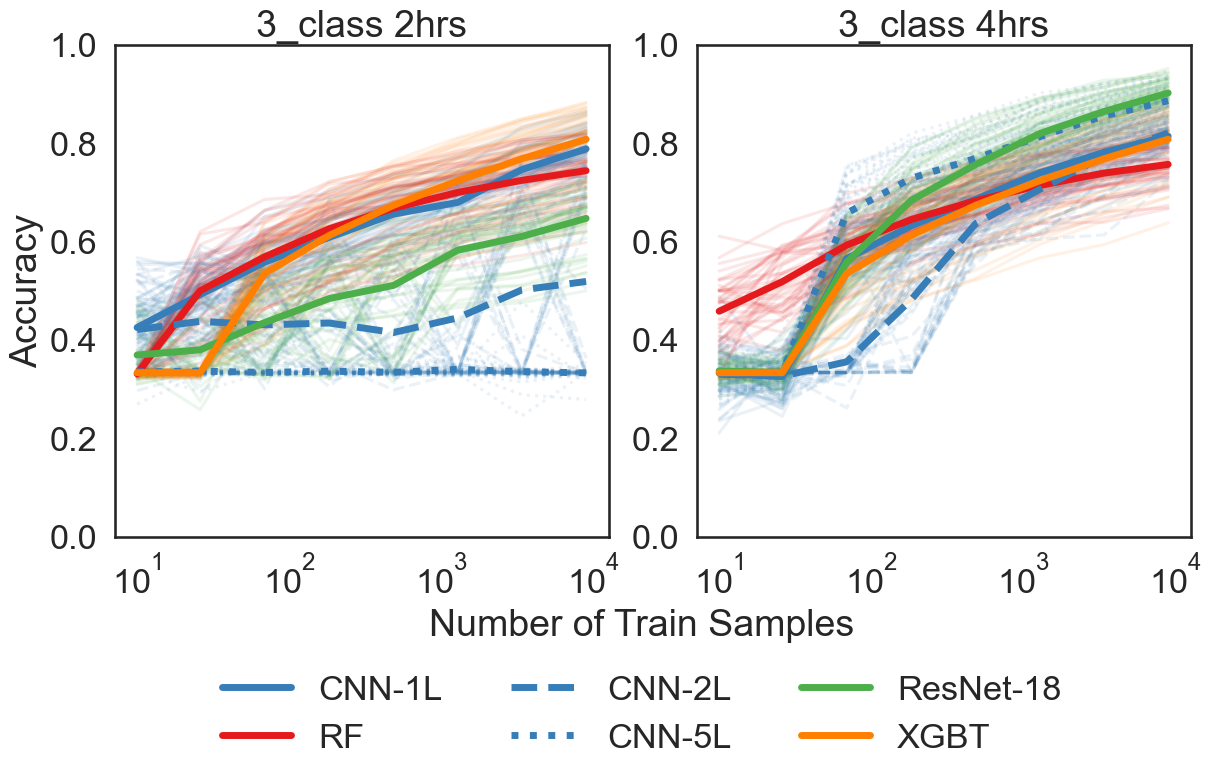

In [42]:
directory = "../benchmarks/vision/"
acc_3_2hr = [
    load_result(directory + "3_class/naive_rf_acc_2hr.txt"),
    load_result(directory + "3_class/cnn32_acc_6hr.txt"),
    load_result(directory + "3_class/cnn32_2l_acc_2hr.txt"),
    load_result(directory + "3_class/cnn32_5l_acc_2hr.txt"),
    load_result(directory + "3_class/resnet18_acc_2hr.txt"),
    load_result(directory + "3_class/gbt_acc_2hr.txt"),
]

acc_3_org = [
    load_result(directory + "3_class/naive_rf.txt"),
    load_result(directory + "3_class/cnn32.txt"),
    load_result(directory + "3_class/cnn32_2l.txt"),
    load_result(directory + "3_class/cnn32_5l.txt"),
    load_result(directory + "3_class/resnet18.txt"),
    load_result(directory + "3_class/gbt_acc_2hr.txt"),
]

# acc_3_4hr = [
#     load_result(directory + "3_class/naive_rf_acc_6hr.txt"),
#     load_result(directory + "3_class/cnn32_acc_6hr.txt"),
#     load_result(directory + "3_class/cnn32_2l_acc_6hr.txt"),
#     load_result(directory + "3_class/cnn32_5l_acc_6hr.txt"),
#     load_result(directory + "3_class/resnet18_acc_6hr.txt"),
#     load_result(directory + "3_class/gbt_acc_6hr.txt"),
# ]

acc_3 = [acc_3_2hr, acc_3_org]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")
samples_space = np.geomspace(10, 9000, num=8, dtype=int)
xtitles = ["3_class 2hrs", "3_class 4hrs"]
yticks = [[0, 0.5, 1], [1e-2, 1e1, 1e3]]

for i, col in enumerate(ax):
    col.set_xscale("log")
    col.set_ylim([0, 1])

    if i == 0:
        col.set_ylabel("Accuracy")
    col.set_title(xtitles[i])
    plot_acc_new(col, acc_3, i, samples_space)
    # if i == 0:
    #     col.set_ylabel("Accuracy")

fig.align_ylabels(
    ax[
        :,
    ]
)

leg = fig.legend(
    bbox_to_anchor=(0.53, -0.3),
    bbox_transform=plt.gcf().transFigure,
    ncol=3,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)

plt.show()



## Comparison of each model of 3 classes

### Xgboost Tree

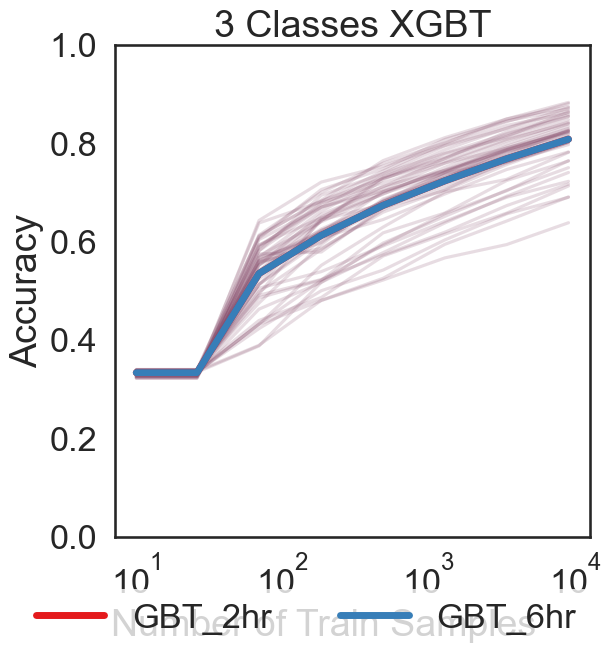

In [54]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 8 : (k + 1) * 8],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 8 : (k + 1) * 8],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="GBT_2hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="GBT_6hr",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


RF = [
    load_result(directory + "3_class/gbt_acc_2hr.txt"),
    load_result(directory + "3_class/gbt_acc_2hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("3 Classes XGBT")

plot_acc_comparison(ax, [RF], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

# plt.savefig("../paper/figures/3class_XGBT_vision.pdf", transparent=True, bbox_inches="tight")
plt.show()



### Naiver Random Forest

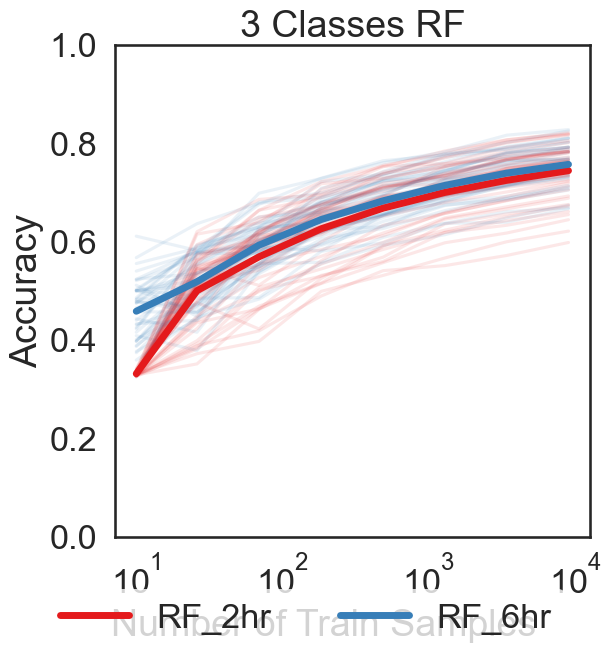

In [55]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 8 : (k + 1) * 8],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 8 : (k + 1) * 8],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="RF_2hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="RF_6hr",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


RF = [
    load_result(directory + "3_class/naive_rf_acc_2hr.txt"),
    load_result(directory + "3_class/naive_rf.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("3 Classes RF")

plot_acc_comparison(ax, [RF], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

# plt.savefig("../paper/figures/3class_XGBT_vision.pdf", transparent=True, bbox_inches="tight")
plt.show()



### CNN32_1l

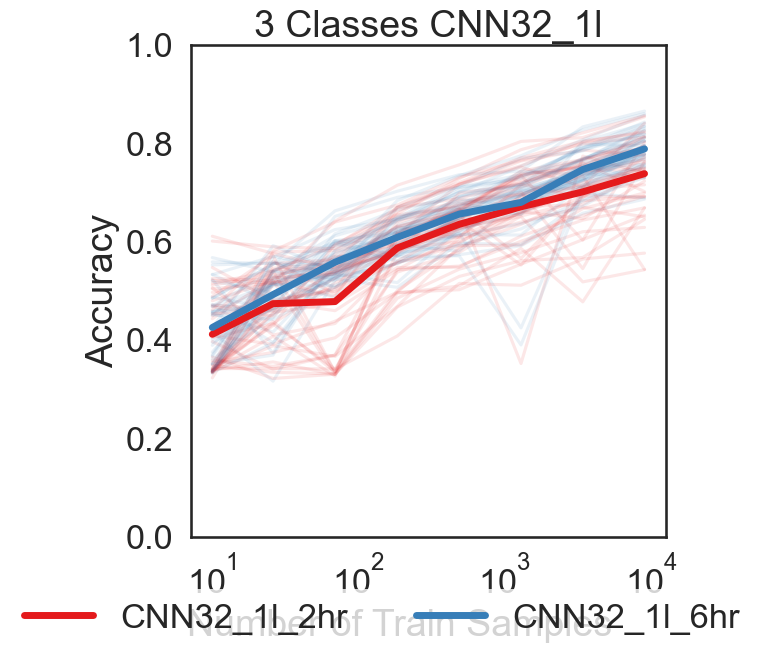

In [56]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 8 : (k + 1) * 8],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 8 : (k + 1) * 8],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="CNN32_1l_2hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="CNN32_1l_6hr",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


RF = [
    load_result(directory + "3_class/cnn32_acc_2hr.txt"),
    load_result(directory + "3_class/cnn32_acc_6hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("3 Classes CNN32_1l")

plot_acc_comparison(ax, [RF], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

# plt.savefig("../paper/figures/3class_XGBT_vision.pdf", transparent=True, bbox_inches="tight")
plt.show()



### CNN32_2l

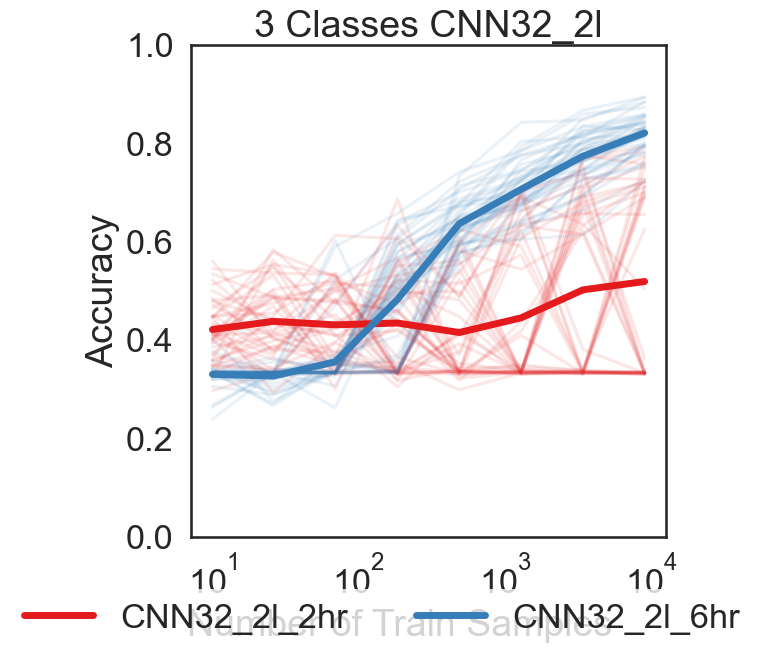

In [57]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 8 : (k + 1) * 8],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 8 : (k + 1) * 8],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="CNN32_2l_2hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="CNN32_2l_6hr",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


RF = [
    load_result(directory + "3_class/cnn32_2l_acc_2hr.txt"),
    load_result(directory + "3_class/cnn32_2l.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("3 Classes CNN32_2l")

plot_acc_comparison(ax, [RF], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

# plt.savefig("../paper/figures/3class_XGBT_vision.pdf", transparent=True, bbox_inches="tight")
plt.show()



### CNN32_5l

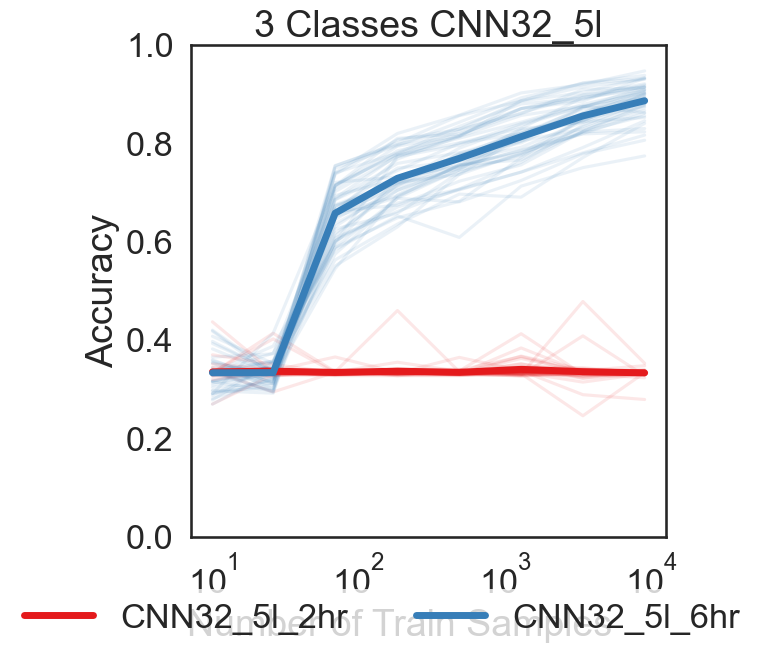

In [58]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 8 : (k + 1) * 8],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 8 : (k + 1) * 8],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="CNN32_5l_2hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="CNN32_5l_6hr",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


RF = [
    load_result(directory + "3_class/cnn32_5l_acc_2hr.txt"),
    load_result(directory + "3_class/cnn32_5l.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("3 Classes CNN32_5l")

plot_acc_comparison(ax, [RF], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

# plt.savefig("../paper/figures/3class_XGBT_vision.pdf", transparent=True, bbox_inches="tight")
plt.show()



### Resnet18

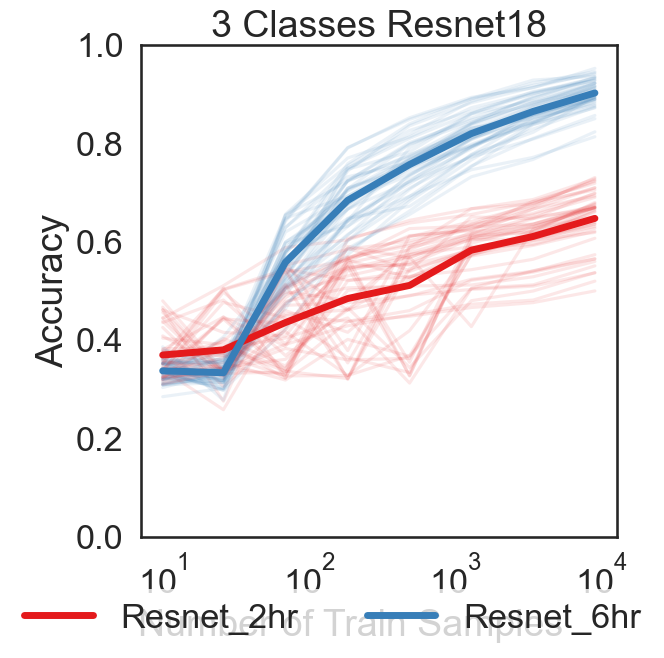

In [52]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 8 : (k + 1) * 8],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 8 : (k + 1) * 8],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="Resnet_2hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="Resnet_6hr",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


RF = [
    load_result(directory + "3_class/resnet18_acc_2hr.txt"),
    load_result(directory + "3_class/resnet18.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("3 Classes Resnet18")

plot_acc_comparison(ax, [RF], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

# plt.savefig("../paper/figures/3class_XGBT_vision.pdf", transparent=True, bbox_inches="tight")
plt.show()



/var/folders/w0/pq4q2kj50fvdt6t_4y4gqfvw0000gn/T/ipykernel_61284/2376881393.py:164: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in leg.legendHandles:


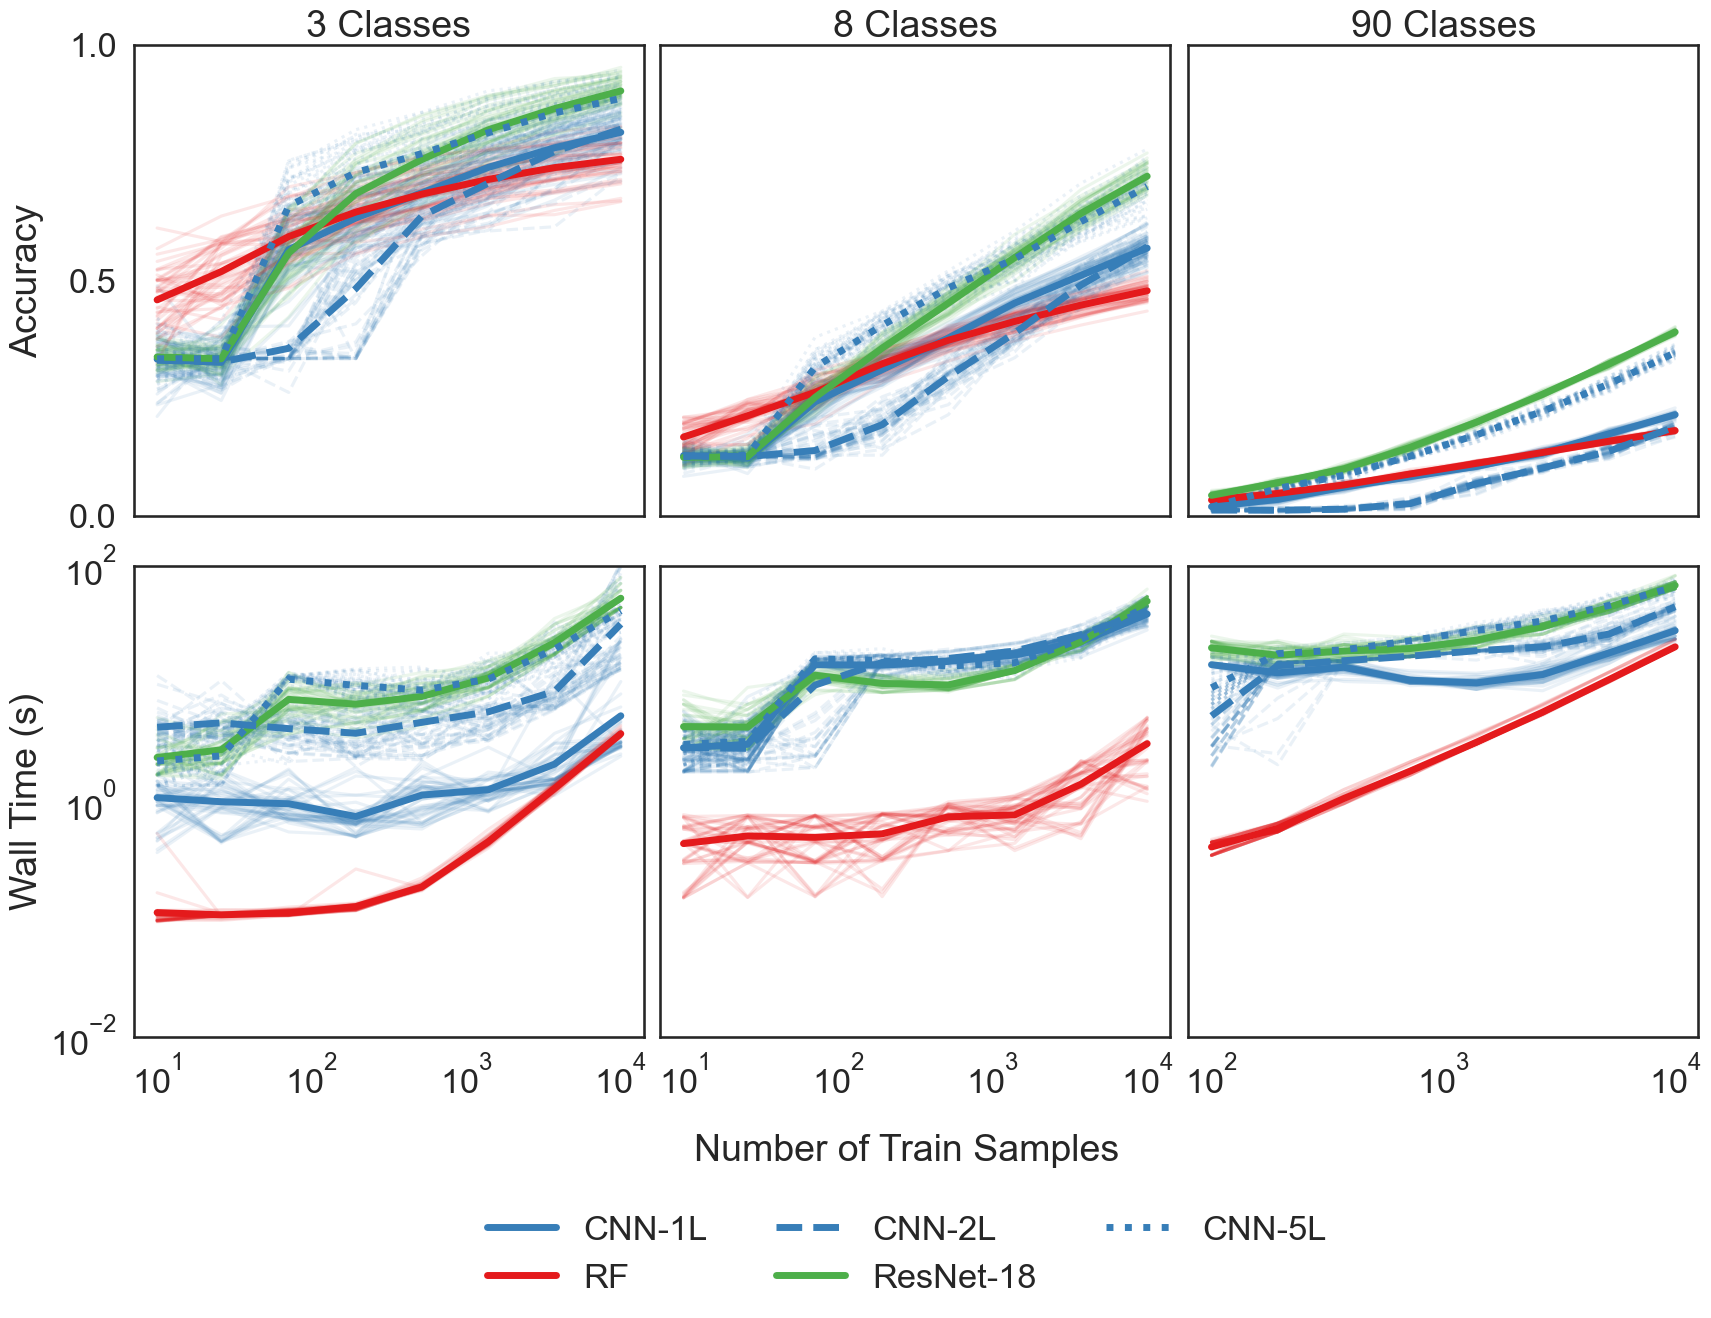

In [9]:
directory = "../benchmarks/vision/"
names = ["naive_rf", "cnn32", "cnn32_2l", "cnn32_5l", "resnet18"]

# Load 3-classes results
acc_3, time_3 = load_results(directory + "3_class/")

# Load 8-classes results
acc_8, time_8 = load_results(directory + "8_class/")

# Load 90-classes results
acc_90, time_90 = load_results(directory + "90_class/")

accs = [acc_3, acc_8, acc_90, time_3, time_8, time_90]
plot_six()
plt.savefig("../paper/figures/cifar.pdf", transparent=True, bbox_inches="tight")

## DF/DN with Fixed Training Time

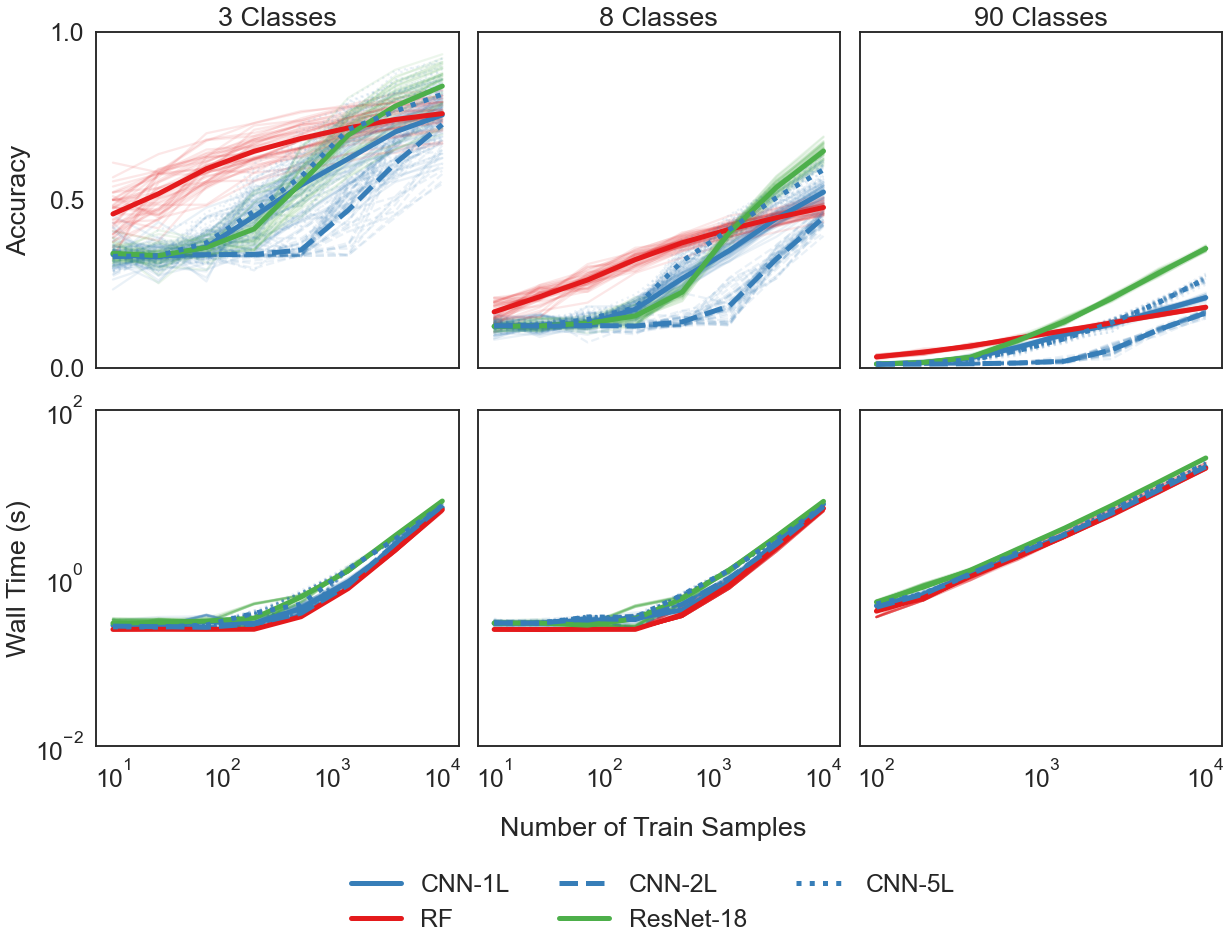

In [6]:
# Load 3-classes results
acc_3, time_3 = load_results_st(directory + "3_class/")

# Load 8-classes results
acc_8, time_8 = load_results_st(directory + "8_class/")

# Load 90-classes results
acc_90, time_90 = load_results_st(directory + "90_class/")

accs = [acc_3, acc_8, acc_90, time_3, time_8, time_90]
plot_six()
plt.savefig("../paper/figures/cifar_st.pdf", transparent=True, bbox_inches="tight")

## DF/DN with Fixed Training Cost

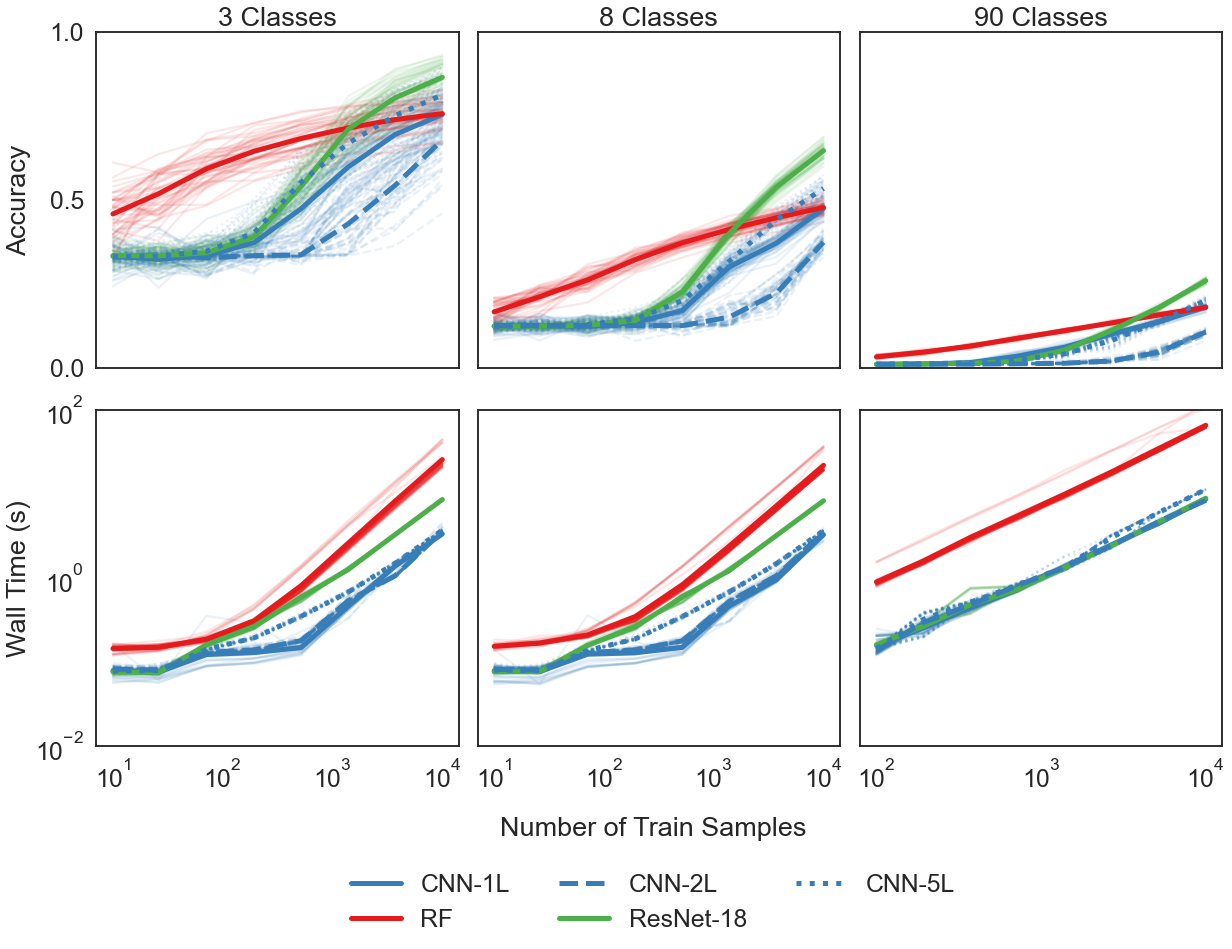

In [7]:
# Load 3-classes results
acc_3, time_3 = load_results_sc(directory + "3_class/")

# Load 8-classes results
acc_8, time_8 = load_results_sc(directory + "8_class/")

# Load 90-classes results
acc_90, time_90 = load_results_sc(directory + "90_class/")

accs = [acc_3, acc_8, acc_90, time_3, time_8, time_90]
plot_six()
plt.savefig("../paper/figures/cifar_sc.pdf", transparent=True, bbox_inches="tight")